In [1]:
import ijson
import pandas as pd
import matplotlib.pyplot as plt

def sample_file(file_path, lines):
    """Reads and prints a specified number of lines from a file, skipping the first three lines."""
    with open(file_path, 'r', encoding='utf-8') as file:
        # Skip the first three lines
        for _ in range(3):
            file.readline()

        # Now read and print the next 'lines' number of lines
        for _ in range(lines):
            print(file.readline().strip())

# Getting a look at the data
file_path = r"C:\Users\nbdav\OneDrive\Desktop\AI Projects\AI_Daily_Projects\healthcare\2024-03-01_anthem_index.json"
sample_file(file_path, 7)


{"reporting_entity_name":"Anthem Inc",
"reporting_entity_type":"health insurance issuer",
"reporting_structure":[
{"reporting_plans":[{"plan_name":"ENTPRS DIABETS - JP AEROTECHNICS - ANTHEM","plan_id_type":"EIN","plan_id":"833362863","plan_market_type":"group"},{"plan_name":"LIVE HEALTH ONLINE - JP AEROTECHNICS - ANTHEM","plan_id_type":"EIN","plan_id":"833362863","plan_market_type":"group"},{"plan_name":"K HEALTH - JP AEROTECHNICS - ANTHEM","plan_id_type":"EIN","plan_id":"833362863","plan_market_type":"group"},{"plan_name":"GA SG BLUE OA POS - JP AEROTECHNICS - ANTHEM","plan_id_type":"EIN","plan_id":"833362863","plan_market_type":"group"}],"in_network_files":[{"description":"BCBS Tennessee, Inc. : Network P","location":"https://anthembcbsga.mrf.bcbs.com/2024-03_890_58B0_in-network-rates_51_of_60.json.gz?&Expires=1713794439&Signature=Q-h4L-G2LEKSu-eCfVqbVcnneBnCqk0kcjOMNIWbioNVF5GOb~io~S69PA5r9ilvcP-Y6xDrCWq3W0tzSZ5A~2AgkbYRk5xyhJKjmvjRmjyJy2hgDAri5aP0ngCm916Vbr9Zcf~8TbNjsV3WWTVMBQnFtvE

In [2]:
def load_json_to_tables(json_file_path):
    # Initialize empty lists for each table as described in the instruction
    main_table = []
    reporting_structure_table = []
    reporting_plans_table = []
    file_location_table = []

    with open(json_file_path, 'rb') as file:
        # Parse JSON file
        items = ijson.items(file, '')

        for item in items:
            # Populate Main Table
            main_table.append({
                'reporting_entity_name': item.get('reporting_entity_name'),
                'reporting_entity_type': item.get('reporting_entity_type'),
                'version': item.get('version')
            })

            # Iterate through Reporting Structure
            for structure in item.get('reporting_structure', []):
                reporting_structure_table.append(structure)
                # Iterate through Reporting Plans
                for plan in structure.get('reporting_plans', []):
                    reporting_plans_table.append(plan)
                    # Iterate through File Location
                    for file_location in structure.get('in_network_files', []):
                        file_location_table.append(file_location)
                    if 'allowed_amount_file' in structure:
                        file_location_table.append(structure['allowed_amount_file'])

    # Convert lists to pandas DataFrames
    main_df = pd.DataFrame(main_table)
    reporting_structure_df = pd.DataFrame(reporting_structure_table)
    reporting_plans_df = pd.DataFrame(reporting_plans_table)
    file_location_df = pd.DataFrame(file_location_table)

    return main_df, reporting_structure_df, reporting_plans_df, file_location_df

# Example usage
json_file_path = r"C:\Users\nbdav\OneDrive\Desktop\AI Projects\AI_Daily_Projects\healthcare\2024-03-01_anthem_index.json"
main_df, reporting_structure_df, reporting_plans_df, file_location_df = load_json_to_tables(json_file_path)

In [122]:
file_location_df.head(10)

,description,location
0,"BCBS Tennessee, Inc. : Network P",https://anthembcbsga.mrf.bcbs.com/2024-03_890_...
1,BCBS Minnesota : Aware,https://anthembcbsga.mrf.bcbs.com/2024-03_720_...
2,Highmark BCBS WV : Super Blue Plus,https://anthembcbsga.mrf.bcbs.com/2024-03_443_...
3,CareFirst BCBS : Select Preferred Provider,https://anthembcbsga.mrf.bcbs.com/2024-03_690_...
4,"BCBS Tennessee, Inc. : Network P",https://anthembcbsga.mrf.bcbs.com/2024-03_890_...
5,"BCBS Tennessee, Inc. : Network P",https://anthembcbsga.mrf.bcbs.com/2024-03_890_...
6,In-Network Negotiated Rates Files,https://anthembcbsga.mrf.bcbs.com/2024-03_254_...
7,In-Network Negotiated Rates Files,https://anthembcbsga.mrf.bcbs.com/2024-03_254_...
8,BCBS Rhode Island : Healthmate Coast to Coast,https://anthembcbsga.mrf.bcbs.com/2024-03_370_...
9,"BCBS Tennessee, Inc. : Network P",https://anthembcbsga.mrf.bcbs.com/2024-03_890_...


In [55]:
# Regular expression to match 'New York' in its various forms and 'ppo' in a case-insensitive manner
# The pattern looks for 'New York' and 'ppo' in any order
regex_pattern = r'(?=.*new\s*york)(?=.*ppo)'

# Filter rows where 'description' matches the regular expression
# The regular expression is case insensitive (re.IGNORECASE)
filtered_df = file_location_df[file_location_df['description'].str.contains(regex_pattern, case=False, na=False, flags=re.IGNORECASE)]

# Remove duplicates based on the 'location' column
filtered_df_no_duplicates = filtered_df.drop_duplicates(subset='location')

# Displaying the filtered DataFrame without duplicates
print(filtered_df_no_duplicates)

,description,location
48,Highmark BS Northeastern NY : Highmark Blue Sh...,https://anthembcbsga.mrf.bcbs.com/2024-03_800_...
71,Highmark BCBS Western NY : HighMark BlueCross ...,https://anthembcbsga.mrf.bcbs.com/2024-03_301_...
187,Highmark BS Northeastern NY : Highmark Blue Sh...,https://anthembcbsga.mrf.bcbs.com/2024-03_800_...
220,Highmark BCBS Western NY : HighMark BlueCross ...,https://anthembcbsga.mrf.bcbs.com/2024-03_301_...
221,Highmark BS Northeastern NY : Highmark Blue Sh...,https://anthembcbsga.mrf.bcbs.com/2024-03_800_...
...,...,...
105088,Highmark BCBS Western NY : HighMark BlueCross ...,https://anthembcbsnv.mrf.bcbs.com/2024-03_301_...
105140,Highmark BCBS Western NY : HighMark BlueCross ...,https://anthembcbsnv.mrf.bcbs.com/2024-03_301_...
105281,Highmark BS Northeastern NY : Highmark Blue Sh...,https://anthembcbsnv.mrf.bcbs.com/2024-03_800_...
105308,Highmark BS Northeastern NY : Highmark Blue Sh...,https://anthembcbsnv.mrf.bcbs.com/2024-03_800_...


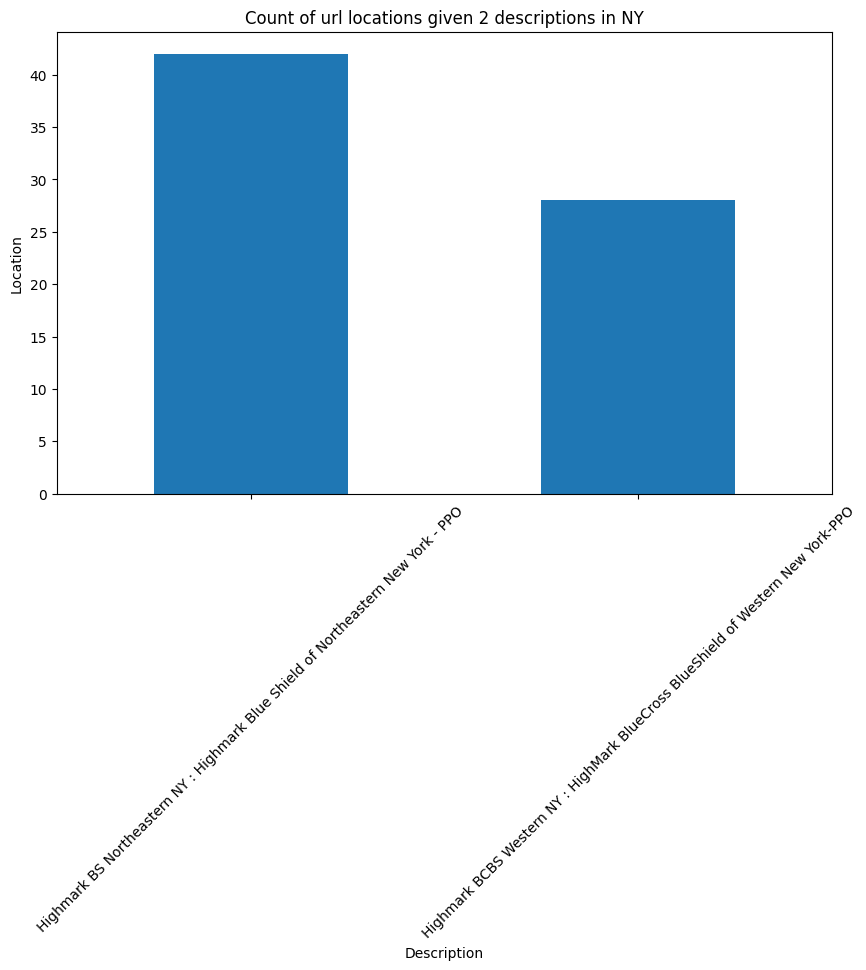

In [126]:
# Count the occurrences of each unique description
description_counts = filtered_df_no_duplicates['description'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
description_counts.plot(kind='bar')
plt.title('Count of url locations given 2 descriptions in NY')
plt.xlabel('Description')
plt.ylabel('Location')
plt.xticks(rotation=45)
plt.show()

In [68]:
# Filter by description this time
filtered_df_no_duplicates_description = filtered_df.drop_duplicates(subset='description')
filtered_df_no_duplicates_description

,description,location
48,Highmark BS Northeastern NY : Highmark Blue Sh...,https://anthembcbsga.mrf.bcbs.com/2024-03_800_...
71,Highmark BCBS Western NY : HighMark BlueCross ...,https://anthembcbsga.mrf.bcbs.com/2024-03_301_...


In [88]:
# Define the file path
save_file_path = r"C:\Users\nbdav\OneDrive\Desktop\AI Projects\AI_Daily_Projects\healthcare\final_url_list.csv"

# Final answer
final_df = filtered_df_no_duplicates['location']

# Save the DataFrame as a CSV file at the specified path
final_df.to_csv(save_file_path, index=False)